In [1]:
# Load libraries
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split

In [2]:
# Create Dummy dataset
num_samples = 500000
X, y = make_classification(n_samples=num_samples)
# Split train and test set
seed = 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [3]:
# test different number of cores: max 8
num_cpu_list = list(range(1,9))
max_sample_list = [int(l * num_samples) for l in [0.1, 0.2, 1, 0.001]]
training_times_all = []

In [4]:
# the default setting for classifier
clf = RandomForestClassifier()

for max_sample in max_sample_list:
    training_times = []
    for num_cpu in num_cpu_list:
        # change number of cores
        clf.set_params(n_jobs=num_cpu)
        start_time = time.time()
        # train classifier on training data
        clf.fit(X_train[:max_sample+1], y_train[:max_sample+1])
        # save the runtime to the list
        training_times.append(time.time() - start_time)
        # print logging message
        print("Computing for {} samples and {} cores DONE.".format(max_sample,num_cpu))
    
    training_times_all.append(training_times)

print("All computations DONE.")

Computing for 50000 samples and 1 cores DONE.
Computing for 50000 samples and 2 cores DONE.
Computing for 50000 samples and 3 cores DONE.
Computing for 50000 samples and 4 cores DONE.
Computing for 50000 samples and 5 cores DONE.
Computing for 50000 samples and 6 cores DONE.
Computing for 50000 samples and 7 cores DONE.
Computing for 50000 samples and 8 cores DONE.
Computing for 100000 samples and 1 cores DONE.
Computing for 100000 samples and 2 cores DONE.
Computing for 100000 samples and 3 cores DONE.
Computing for 100000 samples and 4 cores DONE.
Computing for 100000 samples and 5 cores DONE.
Computing for 100000 samples and 6 cores DONE.
Computing for 100000 samples and 7 cores DONE.
Computing for 100000 samples and 8 cores DONE.
Computing for 500000 samples and 1 cores DONE.
Computing for 500000 samples and 2 cores DONE.
Computing for 500000 samples and 3 cores DONE.
Computing for 500000 samples and 4 cores DONE.
Computing for 500000 samples and 5 cores DONE.
Computing for 500000 

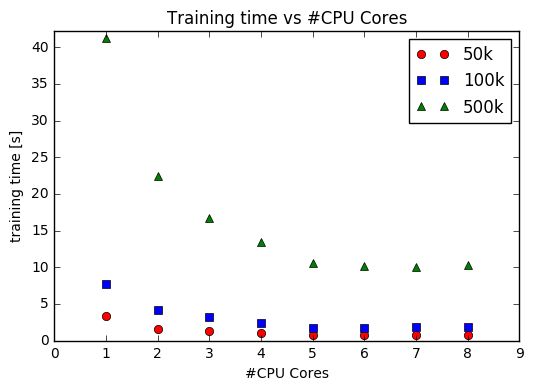

In [5]:
plt.plot(num_cpu_list, training_times_all[0], 'ro', label="{}k".format(max_sample_list[0]//1000))
plt.plot(num_cpu_list, training_times_all[1], "bs" , label="{}k".format(max_sample_list[1]//1000))
plt.plot(num_cpu_list, training_times_all[2], "g^" , label="{}k".format(max_sample_list[2]//1000))
plt.axis([0, len(num_cpu_list)+1, 0, max(training_times_all[2])+1])
plt.title("Training time vs #CPU Cores")
plt.xlabel("#CPU Cores")
plt.ylabel("training time [s]")
plt.legend()
plt.show()

The training time decreases expotentially with increasing number of CPU cores.

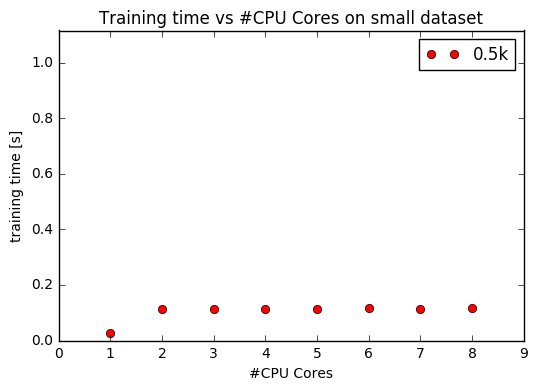

In [6]:
plt.plot(num_cpu_list, training_times_all[3], 'ro', label="{}k".format(max_sample_list[3]/1000))
plt.axis([0, len(num_cpu_list)+1, 0, max(training_times_all[3])+1])
plt.title("Training time vs #CPU Cores on small dataset")
plt.xlabel("#CPU Cores")
plt.ylabel("training time [s]")
plt.legend()
plt.show()

For small datasets however the overhead introduced by multiprocessing can be highier than the actual execution time needed for training. In that case using multiple cores (**n_jobs > 1**) will not lead to decreased execution times.